In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from tqdm import tqdm

In [259]:
df = pd.read_csv("token.csv")
df.head()

순위  mean           ISBN                 상품명           저자     출판사  \
0  27.0  28.7  2510567147905  아직 끝이 아니다 (양장 한정판)          김연경      가연   
1  59.0  59.0  2511464896507     만화로 보는 3분 철학 세트      서정욱/김재훈   카시오페아   
2  16.0  44.2  9782067255425     미쉐린 가이드 서울 2022  미쉐린 트래블 파트너  미쉐린코리아   
3  51.0  39.1  9788901033518                 돼지책  앤서니 브라운/허은미   웅진주니어   
4  79.0  79.0  9788901047904               우리 엄마  허은미/앤서니 브라운   웅진주니어   

                                                  설명   관리분류  \
0  꿈을 꾸는 것이 무엇이든 해야 하고 한국 여자배구 사상 최고의 왼쪽 공격수 김연경이...    에세이   
1  지금까지 이런 철학 만화는 없었다 철학의 기초 개념을 잡는 가장 쉬운 만화로 분이면...     인문   
2  세계 권위의 레스토랑 호텔 평가서이자 전세계 미식가들의 바이블인 미쉐린 가이드 미슐...  건강 취미   
3  그림책의 거장 앤서니 브라운의 대표작 돼지책 국내 주년 기념 리커버 한정판 진지한 ...     유아   
4  인기 그림책 작가 앤서니 브라운의 신작 아이에게 세상에서 가장 놀랍고 뛰어난 존재인...     유아   

                                              설명_okt  
0  ['꿈', '것', '무엇', '한국', '여자배구', '사상', '최고', '왼쪽...  
1  ['지금', '철학', '만화', '철학', '기초', '개념', '가장', '만화...  
2  ['세계', '권위', '레스토랑', '호텔', '평가', '이자', '전세계', ...  
3  ['그림책', '거장', '앤서니', '브라운', '대표', '작', '돼지', '...  
4  ['인기', '그림책', '작가', '앤서니', '브라운', '신작', '아이', ...

In [260]:
df = df[['순위', 'mean', 'ISBN', '상품명', '저자', '출판사', '설명_okt', '관리분류']]
df['설명'] = df['설명_okt']
df = df[['순위', 'mean', 'ISBN', '상품명', '저자', '출판사', '설명', '관리분류']]

In [261]:
df['관리분류'] =df['관리분류'].str.replace("가정 살림|어린이", "유아", regex=True)
df['관리분류'] =df['관리분류'].str.replace("수험서 자격증|대학교재|국어 외국어 사전|만화/라이트노벨", "IT 모바일", regex=True)
df['관리분류'] =df['관리분류'].str.replace("청소년", "역사", regex=True)

In [298]:
df['관리분류'].value_counts()

에세이        409
경제 경영      329
역사         322
인문         316
사회 정치      312
종교         294
예술         270
소설/시/희곡    261
자기계발       254
IT 모바일     230
유아         220
자연과학       219
건강 취미      191
Name: 관리분류, dtype: int64

In [262]:
NONE = df[df['관리분류'].str.contains('미분류')].index
df.drop(NONE, inplace=True)
df = df.reset_index()

In [263]:
df.tail()

index    순위  mean           ISBN                   상품명  \
3622   3625  48.0  41.5  9791197980701           자소서 바이블 2.0   
3623   3626  29.0  29.0  9791198013002        웹 3.0 넥스트 이코노미   
3624   3627  30.0  45.0  9791198029294        부동산 하락장에서 살아남기   
3625   3628  13.0  12.5  9791198042804      무뎌진 감정이 말을 걸어올 때   
3626   3629  31.0  31.0  9791198063625  물릴종목 팔릴종목 나에게 물어봐 세트   

                                          저자                 출판사  \
3622                                  면접왕 이형  얼라이브북스(alivebooks)   
3623  김미경/에리카 강/권헌영/김승주/신동형/윤준탁 /이승환/이신혜/정지훈              어웨이크북스   
3624                                  대치동 키즈                  재유   
3625                                     김소영           책발전소X테라코타   
3626                                     김정수              헤리티지북스   

                                                     설명    관리분류  
3622  ['독보', '취업', '유튜버', '면접', '이형', '자소', '바이블', '...  IT 모바일  
3623  ['물가', '금리', '인상', '폭등', '환율', '길이', '보이지', '불...   경제 경영  
3624  ['무', '주택', '주택', '금융', '위기', '하락', '먼저', '차',...   경제 경영  
3625  ['아나운서', '당인', '리책', '발전소', '서점', '주인', '방송인',...     에세이  
3626  ['공부', '손실', '투자', '패턴', '분석', '뜬구름', '투자', '법...   경제 경영

In [264]:
df = df[['순위', 'mean', 'ISBN', '상품명', '저자', '출판사', '설명', '관리분류']]

In [265]:
df['관리분류'].value_counts()

에세이        409
경제 경영      329
역사         322
인문         316
사회 정치      312
종교         294
예술         270
소설/시/희곡    261
자기계발       254
IT 모바일     230
유아         220
자연과학       219
건강 취미      191
Name: 관리분류, dtype: int64

In [266]:
df['설명'] = df["설명"].str.replace('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z ]', "", regex=True)
df['설명']

0       꿈 것 무엇 한국 여자배구 사상 최고 왼쪽 공격수 김연경 주목 유년 시절 일본 터키...
1       지금 철학 만화 철학 기초 개념 가장 만화 개념 서양 철학사 철학 현대 철학 권 세...
2       세계 권위 레스토랑 호텔 평가 이자 전세계 미식 바이블 미쉐린 가이드 미슐랭 가이드...
3       그림책 거장 앤서니 브라운 대표 작 돼지 책 국내 주년 기념 리 커버 한정판 메시지...
4       인기 그림책 작가 앤서니 브라운 신작 아이 세상 가장 존재 엄마 모습 그림 글 만능...
                              ...                        
3622    독보 취업 유튜버 면접 이형 자소 바이블 개정판 최종 합격 연결 자소 성법 지원 동...
3623    물가 금리 인상 폭등 환율 길이 보이지 불황 시대 우리 돈 기회 잡 것 대한민국 전...
3624    무 주택 주택 금융 위기 하락 먼저 차 투자자 맞춤 답안 차 투자자 대치동 키즈 과...
3625    아나운서 당인 리책 발전소 서점 주인 방송인 활동 인생 방향 김소영 책 문장 힘 그...
3626    공부 손실 투자 패턴 분석 뜬구름 투자 법 가라 구체 행동지침 수록 공부 실전 투자...
Name: 설명, Length: 3627, dtype: object

# 불용어 제거

In [267]:
stopwords = ["합니다", "입니다", "있다", "이 책은", "이", '점', '기', '가장', '코나', '게', '시대', 
        "그", "베스트셀러", "등", "것을", "저자가", "된다", '자', '너', '답', '손', '명', '저', 
        "있는", "위해", "책은", "그리고", "년", "대한", "통해", "저자는", "수 있도록", "것이다", "을", "것", "내", "의", "개의", "더", "될", "개", 
        "및", "여", "각", "때", "중", "때", "전", "은", "건", "어떻게", "를", "는", "내가", "만", '할', '후', 
        "후", "을", "에", "로", "대해", "모든", "한", "된", "다", "되었다", "개의", "더", "될", "개", 
        "수", "것은", "위한", "아니라", "우리가", "있습니다", "어떤", '간', '부', '것', '무엇', '럽', '가지', '제'
        '것', '책', '동안', '첫', '안', '를', '등', '곳', '왜', '의', '이', '작', '서', '기', '세', '인간',
        '간', '위', '우리', '나', '년', '온', '누구', '알', '때', '권', '돌아왔', "찾아왔", "밝아졌", 
        '역', "요", "팬", "천", "김", "달", "분", "남", "오늘날", "새", '사랑', 
        '이야기', '때문', '속', '태어났', '받아들였', "일어났", '풀어졌', '만났', "해", "설서", "올랐", '위', '리', '제', 
        "베스트셀러" , "출간", "말", "분야", "최고", "말", "독자", "동안", "때", "일", "날", '생각', '문제', '집', '듯', 
        "순간", "이후", "시간", "기록", "이상", "최초", '무엇', '팩', '션', '간', '단', '번', '레', '기', '후', '그', '장' 
        '해', '주요', 'ㄱ', 'ㅂ', 'ㅅ', 'ㅎ', '권은', '은', '장', '몰', '튜브', '우리', '이야기', '자신', '망', '린', '호', '점'
        '유', '등', '년', '그', '파', '방', '작가', '이야기', '독자', '출간', '나', '자신', '뭐', '한국', '대한민국', '글', '스스', '글', '관계', '바로', 
        "션", "에디", "부", "나", "하나", "살", "일", "권", "세", "두", "이제", "때", '잇습니다', '가', '틱낫', '편', '개정', '판', '특징',
        "번", "관", "이", "티니", "실록", "간", "스", "작", "회", "자기", "곳", '것이', '치', '지금', '당신', '못', '징', '니로', '과', '고'
        '단', '아이히만은', '국립어린이청소년도서관', '도서', '권장도서', '나' '시간' '글', '때', "이것", '독자', '다른', '질문', '에세이', '목', '깃', '서',
        '그림', '세상', '오늘', '하루', '문장', '선정', '번역', '대표', '월', '기', '저자', '모두', '채', '로서', '향', '존', 
        '다시', '또', '드잉', '북', '무', '일상', '법', '눈', '매일', '줄', '핑', '뿐', '데', '그것', '계속', '진짜', '해리', '또한', 
        '개정판', '판매', '주년', '수록', '이번', '셀러', '앞', '선택', '이자', '강력', '올해', '최신', '칼', '원']


def remove_stop(text):
        token = text.split(" ")
        stops = stopwords
        meaningful_words = [w for w in token if  w not in stops]
        return ' '.join(meaningful_words)

In [268]:
df["설명"] = df["설명"].map(lambda x : remove_stop(x))
df["설명"] = df['설명'].str.replace("[\s]+", " ", regex=True)

In [269]:
df.head()

순위  mean           ISBN                 상품명           저자     출판사  \
0  27.0  28.7  2510567147905  아직 끝이 아니다 (양장 한정판)          김연경      가연   
1  59.0  59.0  2511464896507     만화로 보는 3분 철학 세트      서정욱/김재훈   카시오페아   
2  16.0  44.2  9782067255425     미쉐린 가이드 서울 2022  미쉐린 트래블 파트너  미쉐린코리아   
3  51.0  39.1  9788901033518                 돼지책  앤서니 브라운/허은미   웅진주니어   
4  79.0  79.0  9788901047904               우리 엄마  허은미/앤서니 브라운   웅진주니어   

                                                  설명   관리분류  
0  꿈 여자배구 사상 왼쪽 공격수 김연경 주목 유년 시절 일본 터키 진출 세계 인정 세...    에세이  
1  철학 만화 철학 기초 개념 만화 개념 서양 철학사 철학 현대 철학 세트 인문학 철학...     인문  
2  세계 권위 레스토랑 호텔 평가 전세계 미식 바이블 미쉐린 가이드 미슐랭 가이드 프랑...  건강 취미  
3  그림책 거장 앤서니 브라운 돼지 국내 기념 커버 한정판 메시지 표현 그림책 고전 열...     유아  
4  인기 그림책 앤서니 브라운 신작 아이 존재 엄마 모습 만능 재주 엄마 가족 엄마 의...     유아

In [270]:
# df.to_csv("before_tomoto.csv")

# Topic Modeling

In [271]:
import tomotopy as tp
print(tp.isa)
import sys
import logging

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

sse2


In [290]:
class TopicModeling :
    # 최소 5개 이상 설명에 등장하고
    # 전체 출현빈도는 15개 이상인 단어만 사용
    def __init__(self, df, k, min_df=5, min_cf=3) : 
        self.df = df
        self.k = k  # 토픽의 개수
        self.min_df = min_df
        self.min_cf = min_cf

    def LDA(self) :

        LDA_model = tp.LDAModel(k=self.k, min_df=self.min_df, min_cf=self.min_cf, tw=tp.TermWeight.ONE, rm_top=3,
                                alpha=0.1, eta=0.01)
        for token in self.df['설명'].str.split(' '):
            LDA_model.add_doc(token)

        return LDA_model

    def train(self, LDA_model):
        LDA_model.train(0)
        print("Num docs :", len(LDA_model.docs), ', vocab_size:', LDA_model.num_vocabs, ', Num words:', LDA_model.num_words)
        print('Removed top word: ', LDA_model.removed_top_words)
        print('Training...', file=sys.stderr, flush=True) 
        for i in range(0, 1000, 100):
            LDA_model.train(100)
            print("Iteration : {}\tLog-likelihood: {}".format(i, LDA_model.ll_per_word))

    def result(self, LDA_model):
        for i in range(LDA_model.k):
            res = LDA_model.get_topic_words(i, top_n=10)
            print("Topic #{}".format(i), end='\t')
            print(', '.join(w for w, p in res))
    
    def get_coherence(self, LDA_model):
        coherence = tp.coherence
        score = coherence.Coherence(LDA_model).get_score()
        perplexity = LDA_model.perplexity
        print("topic 개수 : ", self.k, "| 사용된 vocab 수 : ", len(LDA_model.used_vocabs) , "| Coherence 점수 : ", score, 
                "| Perplexity 점수 : ", perplexity)
        return score, perplexity

* perplexity : 문서를 잘 설명하지 못하는 수치이기에 낮을수록 토픽 문서를 잘 설명한다.
* coherence : 토픽이 얼마나 일관되게 문서를 설정하는 지 의미한다. 수치가 높을수록 문서를 잘 설명하는 것이기에 높을수록 좋다.

In [302]:
lda = TopicModeling(df, 30)
model = lda.LDA()
lda.train(model)
len(model.used_vocabs)
lda.result(model)
lda.get_coherence(model)

Training...


Num docs : 3627 , vocab_size: 5085 , Num words: 161833
Removed top word:  ['사람', '세계', '삶']
Iteration : 0	Log-likelihood: -7.955274288820936
Iteration : 100	Log-likelihood: -7.880144524666578
Iteration : 200	Log-likelihood: -7.855629827909739
Iteration : 300	Log-likelihood: -7.8418776048044245
Iteration : 400	Log-likelihood: -7.832901482282421
Iteration : 500	Log-likelihood: -7.823406080540578
Iteration : 600	Log-likelihood: -7.815794188205946
Iteration : 700	Log-likelihood: -7.807335691804042
Iteration : 800	Log-likelihood: -7.805978599107603
Iteration : 900	Log-likelihood: -7.796885927813102
Topic #0	사건, 전쟁, 러시아, 범죄, 법정, 웹소설, 뉴스, 보도, 비행, 우크라이나
Topic #1	과학, 우주, 지식, 인류, 연구, 설명, 진화, 교수, 과학자, 추천
Topic #2	소설, 작품, 시인, 문학, 시, 산문, 신작, 시집, 장편소설, 문학상
Topic #3	마음, 감정, 위로, 인생, 공감, 행복, 상처, 전하, 누군가, 힘
Topic #4	사진, 일러스트, 기념, 초판, 기존, 표지, 커버, 선생, 직접, 탄생
Topic #5	뇌, 한글, 이재명, 과학, 학습, 별, 과학자, 기억, 숫자, 성격
Topic #6	이해, 설명, 구성, 내용, 기본, 기초, 학습, 핵심, 입문, 활용
Topic #7	서울, 도시, 길, 음식, 맛집, 순례, 제주, 맛, 포터, 사기
Topic #

(-4.930759330566582, 2433.0135884149136)

In [300]:
model.summary()

<Basic Info>
| LDAModel (current version: 0.12.3)
| 3627 docs, 161833 words
| Total Vocabs: 18960, Used Vocabs: 5085
| Entropy of words: 7.84167
| Entropy of term-weighted words: 7.84167
| Removed Vocabs: 사람 세계 삶
|
<Training Info>
| Iterations: 1000, Burn-in steps: 0
| Optimization Interval: 10
| Log-likelihood per word: -7.85804
|
<Initial Parameters>
| tw: TermWeight.ONE
| min_cf: 3 (minimum collection frequency of words)
| min_df: 5 (minimum document frequency of words)
| rm_top: 3 (the number of top words to be removed)
| k: 18 (the number of topics between 1 ~ 32767)
| alpha: [0.1] (hyperparameter of Dirichlet distribution for document-topic, given as a single `float` in case of symmetric prior and as a list with length `k` of `float` in case of asymmetric prior.)
| eta: 0.01 (hyperparameter of Dirichlet distribution for topic-word)
| seed: 2973596982 (random seed)
| trained in version 0.12.3
|
<Parameters>
| alpha (Dirichlet prior on the per-document topic distributions)
|  [0.36

In [287]:
df['top_topic'] = 0
df['topic_dist'] = 0
df['topic_words'] = 0

for i in tqdm(range(len(model.docs))):
    df["topic_dist"][i] = model.docs[i].get_topics(top_n=4)
    df['top_topic'][i] = model.docs[i].get_topics()[0][0]
    res = model.get_topic_words(df['top_topic'][i], top_n=5)
    df["topic_words"][i] = ' '.join(w for w, p in res)

df.sample(10)

100%|██████████| 3627/3627 [00:00<00:00, 4783.16it/s]


순위  mean           ISBN                  상품명          저자     출판사  \
777    7.0  38.3  9788958078791       걸으면 보이는 도시, 서울         이종욱     뜨인돌   
854   57.0  39.0  9788960907348              애쓰지 않아도     김세희/최은영    마음산책   
2282  59.0  59.0  9791166570599       이건희 컬렉션 TOP 30         이윤정     센시오   
1247  73.0  73.0  9788986022100                식물의 책         이소영  책읽는수요일   
1689  25.0  48.5  9791157062409              사람이 있었네         김경수   비타베아타   
2656  62.0  62.0  9791187861201        이승만의 생애와 건국비전         유영익    청미디어   
3364  35.0  22.0  9791192675152              잘 산다는 것  유진 피터슨/홍종락   복있는사람   
1177  16.0  27.0  9788980406371  교실 속 갈등상황 100문 101답      우리교육 편    우리교육   
293   65.0  65.0  9788933801840               엄마의 말뚝         박완서     세계사   
592   75.0  65.0  9788950995553               행복의 기원         서은국  21세기북스   

                                                     설명     관리분류  top_topic  \
777   도시 서울 뚜벅뚜벅 드로잉 서울 공간 서울역 중심 도심 골목 장소 서린 대의 레이어...      에세이          3   
854   사람 마음 좀처럼 자꾸만 노력 마음 최은영 신작 소설 등단 줄곧 마음 서사 동시 폭...  소설/시/희곡         13   
2282  이건희 컬렉션 특별 초대 이건희 컬렉션 미술품 화가 작품 엄선 소개 이건희 컬렉션 ...       예술          6   
1247  곁 미처 보이지 식물 생활 식물 세밀화 가의 시선 도시 식물 공원 가로수 정원 식물...     자연과학          6   
1689  사람 만들기 도전 김경수 정치가 미래 상식 통 주장 균형감각 정세 판단 소유자 현실...    사회 정치          1   
2656  이승 고집 친미 외교 독립 노선 집착 나머지 정견 달리 독립운동가 융화 로부터 소외...    사회 정치          7   
3364  삶 발견 박영선 김기석 김영봉 목사 추천 회서 신 설교 목회 현장 유진 피터 슨 원...       종교          9   
1177  교실 갈등 상황 문 연재 내용 판단 상황 가름 구분 매 장면 접근 태도 교사 답글 ...    사회 정치         16   
293   지난 세기 사람 경험 상황 세계 경험 박완서 역작 엄마 말뚝 박완서 편의 단편소설 ...  소설/시/희곡         13   
592   행복 생존 번식 행복 진화 산물일 사람 둘 실연 밤 얼마나 가슴속 상처 이별 약 약...       인문          2   

                                             topic_dist        topic_words  
777   [(3, 0.4056958854198456), (5, 0.22445048391819...    여행 정보 도시 여행지 소개  
854   [(13, 0.6040271520614624), (15, 0.271684587001...     소설 작품 영화 문학 일본  
2282  [(6, 0.6480596661567688), (5, 0.14599023759365...     작품 미술 시인 사진 예술  
1247  [(6, 0.37214410305023193), (16, 0.339805752038...     작품 미술 시인 사진 예술  
1689  [(1, 0.3064280152320862), (7, 0.27318373322486...  대통령 사건 이재명 국민 문재인  
2656  [(7, 0.4544300138950348), (16, 0.1838697940111...     사회 미국 전쟁 정치 경제  
3364  [(9, 0.4511418044567108), (15, 0.2425684928894...    하나님 기도 성경 교회 말씀  
1177  [(16, 0.3616575300693512), (2, 0.1197304502129...     시작 방법 이유 상황 사실  
293   [(13, 0.3674142360687256), (2, 0.2946733832359...     소설 작품 영화 문학 일본  
592   [(2, 0.367574006319046), (15, 0.28543600440025...   심리학 인류 환경 코로나 심리

In [154]:
# df['topic_dist'][1]

In [288]:
topic_dist = df["top_topic"].value_counts()
topic_dist = pd.DataFrame(topic_dist)
topic_dist

top_topic
16        421
15        397
5         302
7         275
17        265
3         232
13        231
11        218
9         175
0         164
2         163
6         155
8         131
12        117
4         108
10         97
1          94
14         82

In [301]:
df.loc[df['top_topic']==10, ('상품명', '관리분류')].sample(30)

상품명     관리분류
1093            감옥으로부터의 사색      에세이
769                  서양사강좌       역사
3353            비즈니스 스테로이드    경제 경영
505                  에세 세트      에세이
2771                  땅콩일기      에세이
2091              초판본 난중일기       역사
1022     행복을 파는 브랜드, 오롤리데이    경제 경영
2401           알고 보면 반할 민화       예술
1066              디자인의 디자인       예술
483                노르웨이의 숲  소설/시/희곡
851                    기러기  소설/시/희곡
2177         카카오톡 이모티콘 만들기   IT 모바일
2772                땅콩일기 2      에세이
1364        난장이가 쏘아올린 작은 공  소설/시/희곡
2637            박영선의 욥기 설교       종교
1715         2023 오늘의 짤 일력      에세이
1269          하리하라의 생물학 카페     자연과학
1943            나를 사랑하는 연습     자기계발
1131               몰입의 즐거움       인문
1509          조셉 머피 부의 초월자     자기계발
253            오디오ㆍ라이프ㆍ디자인       예술
3487        쉽게 보는 난중일기 완역본       역사
1573         나는 미니멀 유목민입니다      에세이
1092    나의 한국현대사 1959-2020       역사
1780     타이탄의 도구들 (블랙 에디션)     자기계발
2726              지구에서 한아뿐  소설/시/희곡
3371             교감완역 난중일기       역사
3528       나는 매일 블로그로 출근한다     자기계발
2883  지적 대화를 위한 넓고 얕은 지식 2       인문
2033       된다! 네이버 블로그&포스트   IT 모바일

In [686]:
# ! pip install pyLDAvis

In [305]:
df = pd.read_csv('after_tomoto_topic_17.csv')

In [306]:
import pyLDAvis
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
pyLDAvis.enable_notebook()

topic_term_dists = np.stack([model.get_topic_word_dist(k) for k in range(model.k)])
doc_topic_dists = np.stack([doc.get_topic_dist() for doc in model.docs])
doc_topic_dists /= doc_topic_dists.sum(axis=1, keepdims=True)
doc_lengths = np.array([len(doc.words) for doc in model.docs])
vocab = list(model.used_vocabs)
term_frequency = model.used_vocab_freq

prepared_data = pyLDAvis.prepare(
    topic_term_dists, 
    doc_topic_dists, 
    doc_lengths, 
    vocab, 
    term_frequency,
    
)
pyLDAvis.save_html(prepared_data, 'ldavis.html')

/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in fav

In [234]:
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

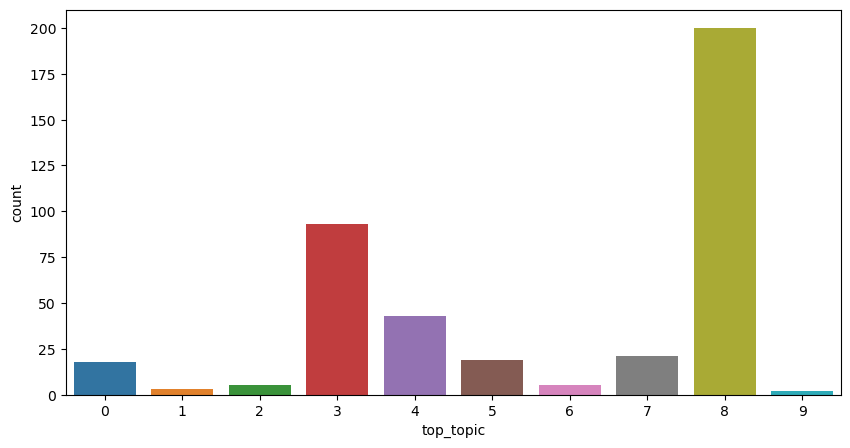

In [115]:
plt.figure(figsize=(10, 5))
sns.countplot(df[df['관리분류']=='에세이'], x='top_topic');

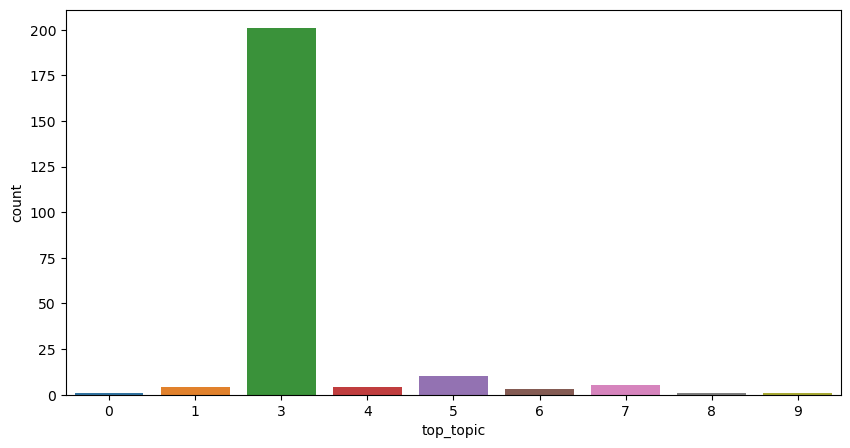

In [337]:
plt.figure(figsize=(10, 5))
sns.countplot(df[df['관리분류']=='IT 모바일'], x='top_topic');

# 워드 클라우드

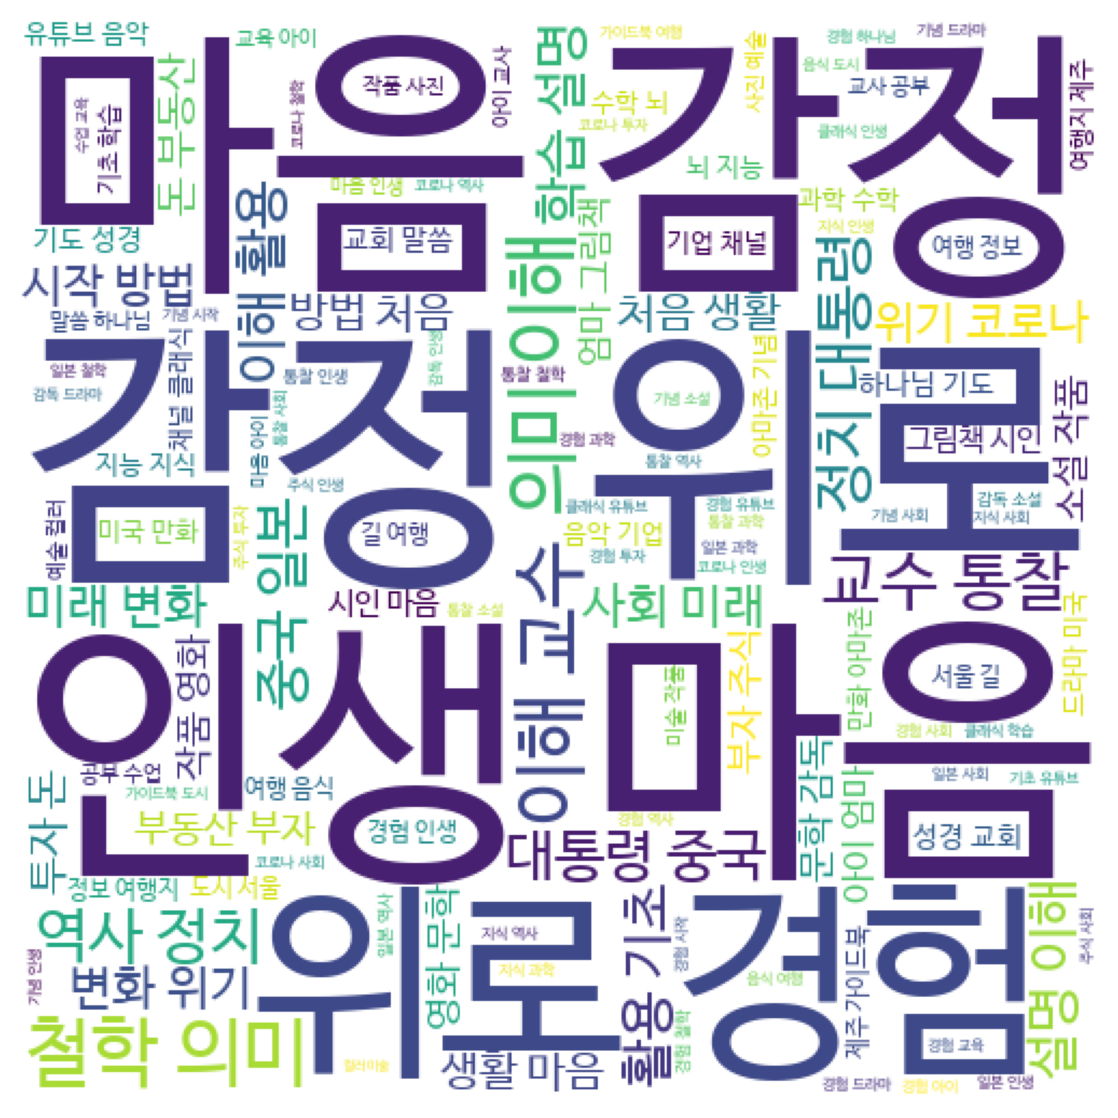

In [309]:
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

def display_word_cloud(data, width=500, height=500):
    word_draw = WordCloud(
        font_path=r"/Library/Fonts/NanumBarunGothic.ttf",
        width=width, height=height,
        stopwords=stopwords, 
        background_color="white",
        random_state=42
    )


    word_draw.generate(data)

    plt.figure(figsize=(10, 7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()

display_word_cloud(" ".join(df['topic_words']))

에세이


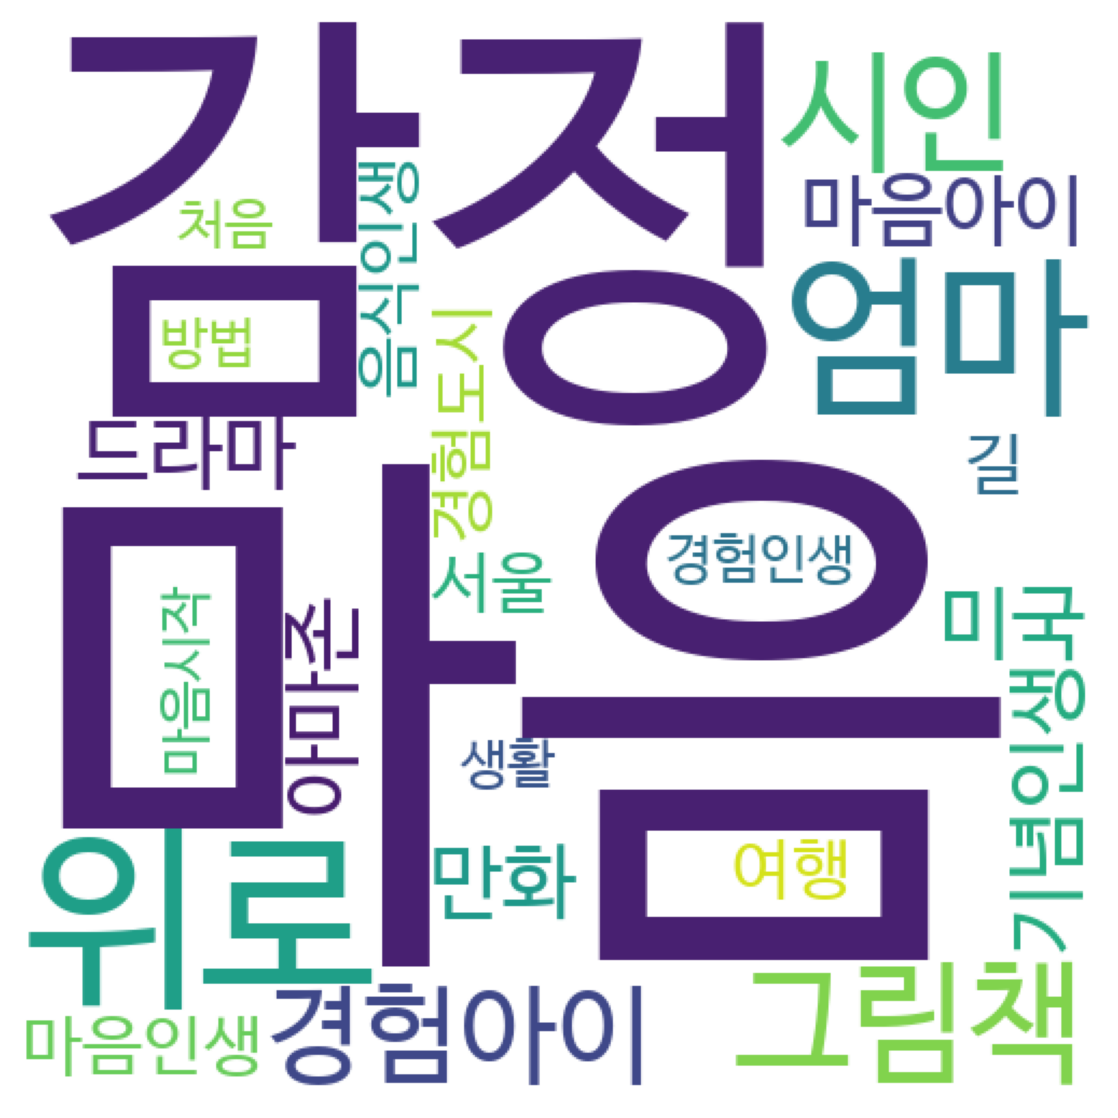

인문


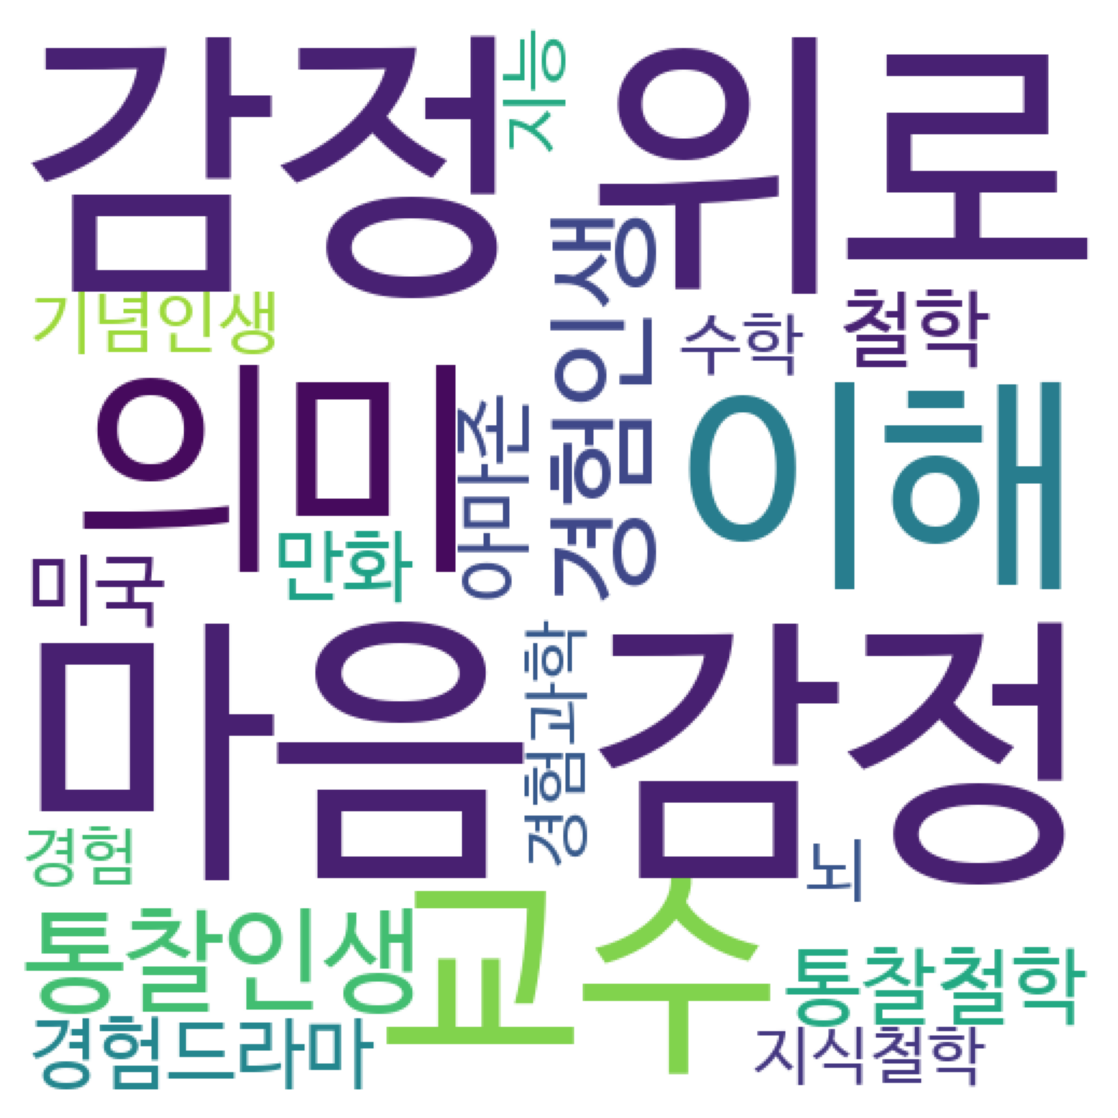

건강 취미


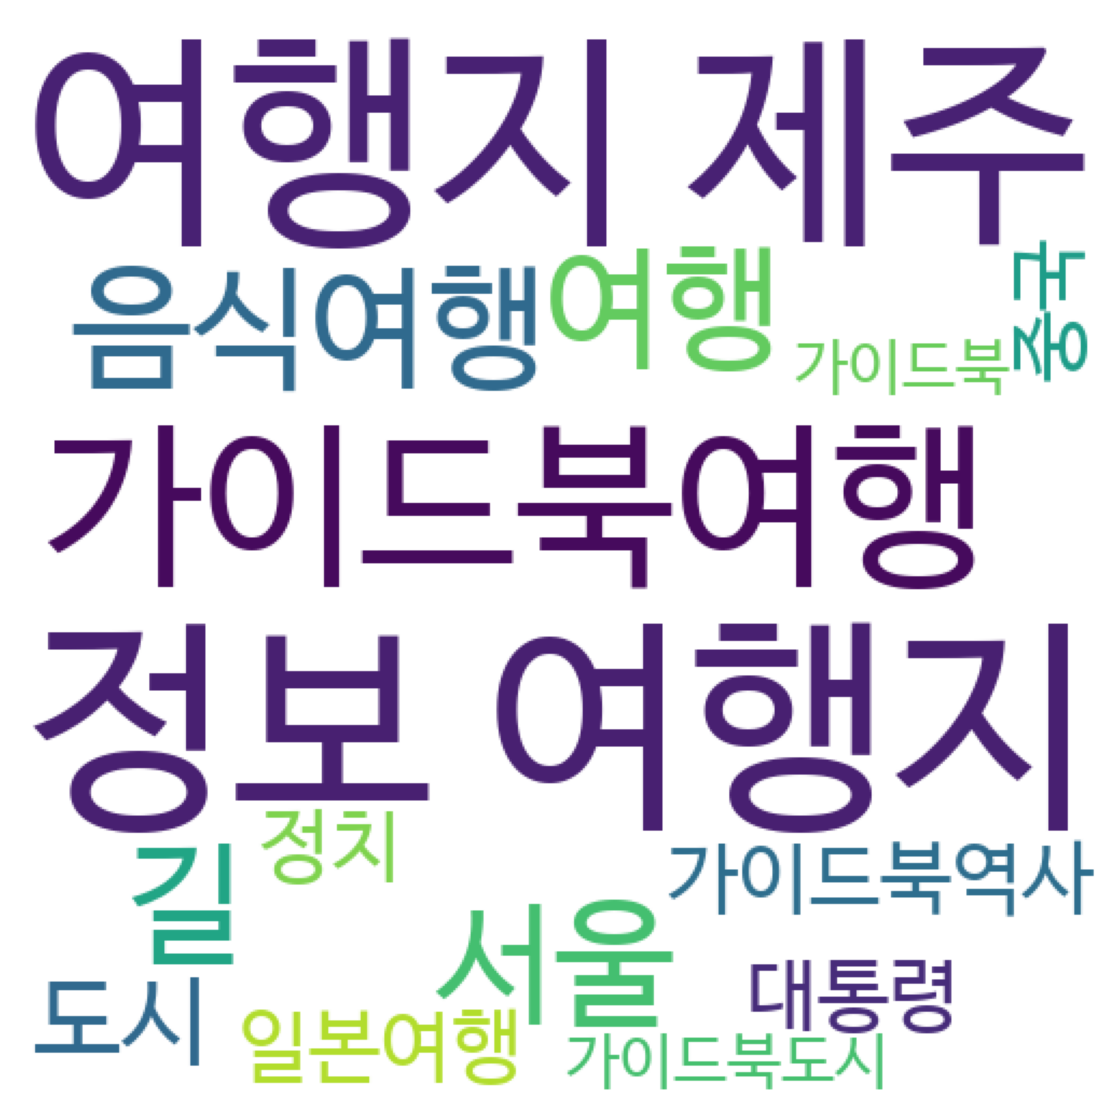

유아


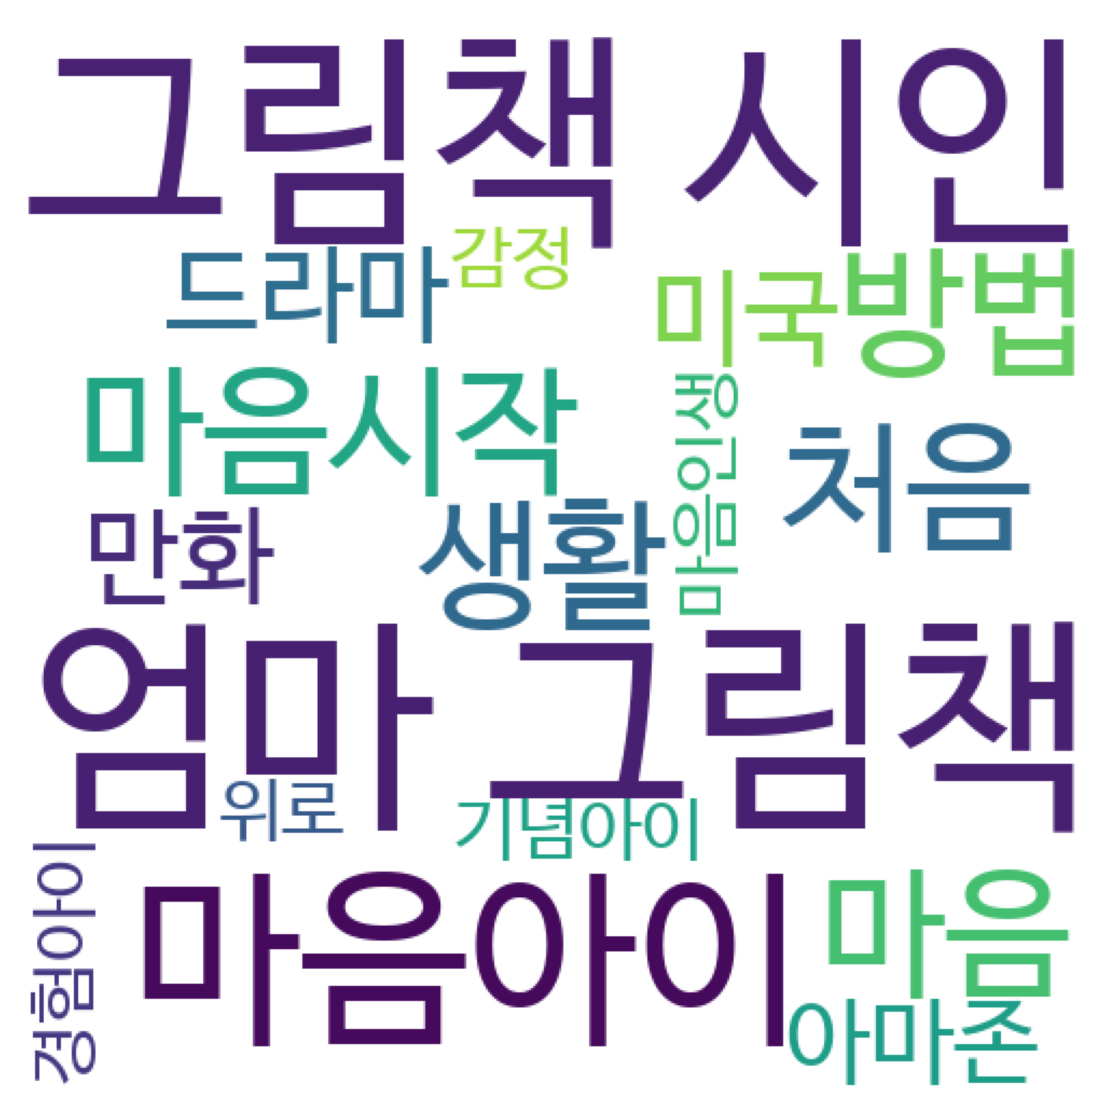

경제 경영


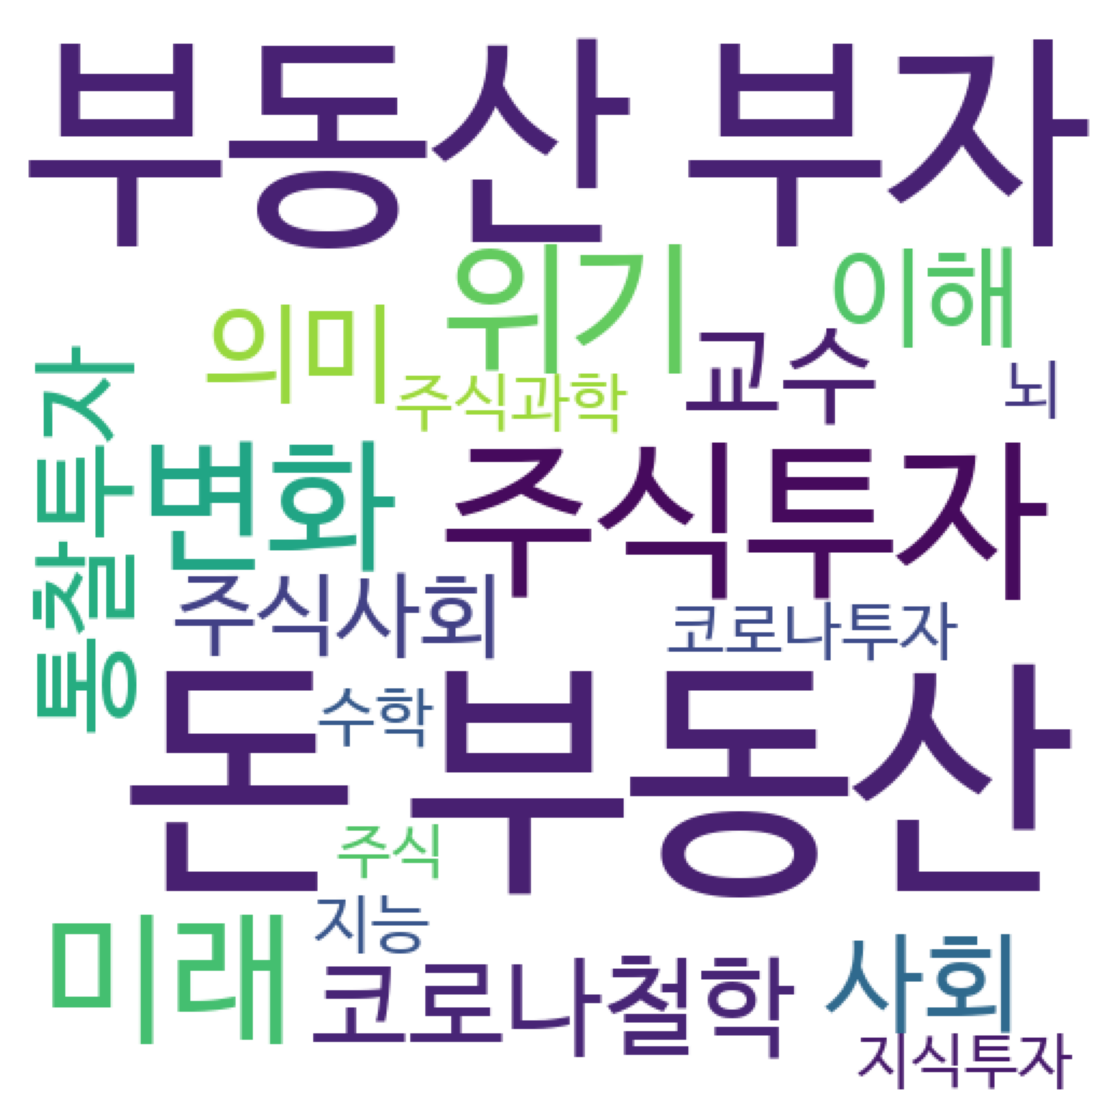

역사


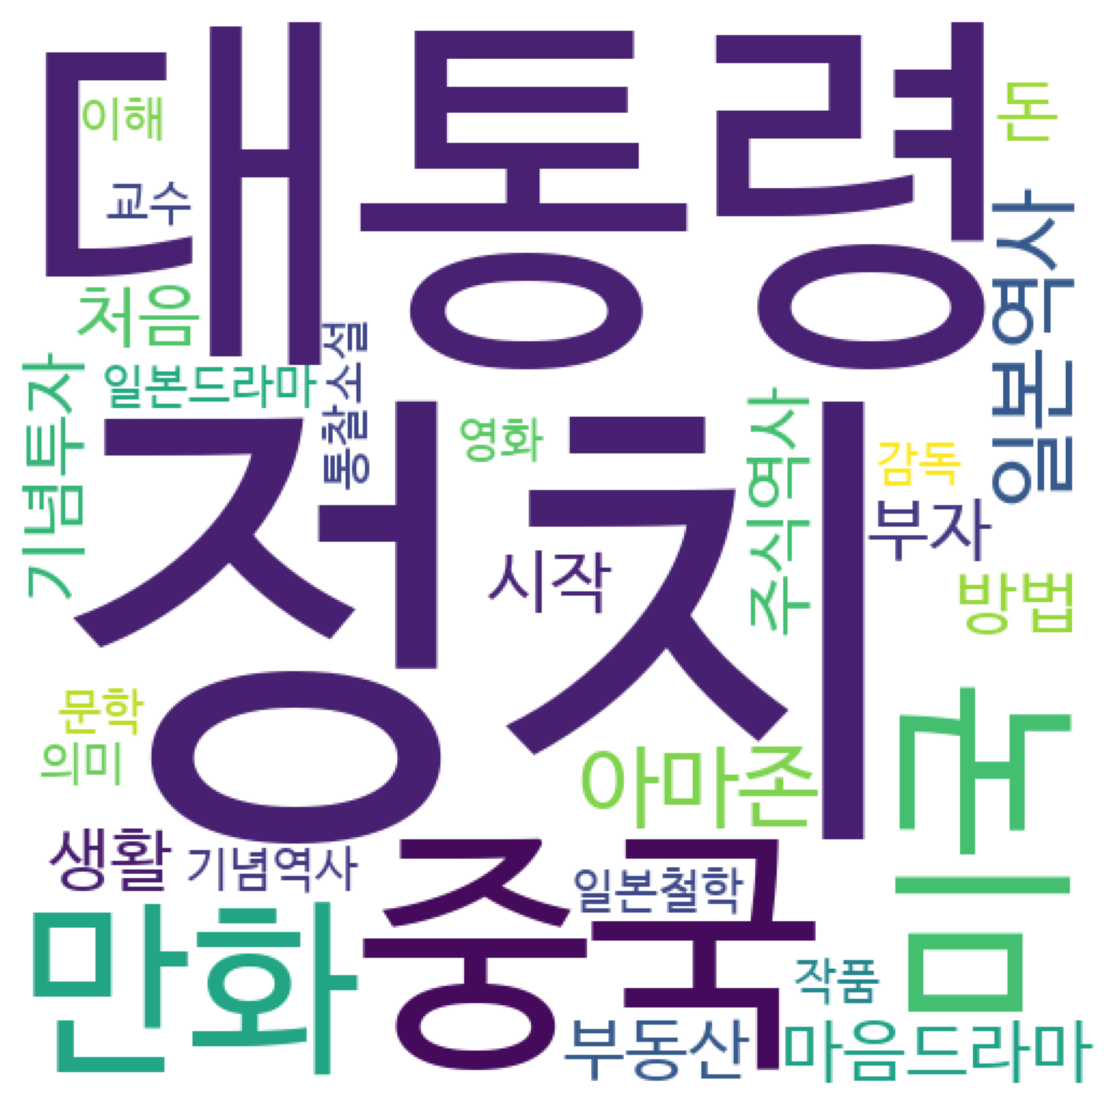

자기계발


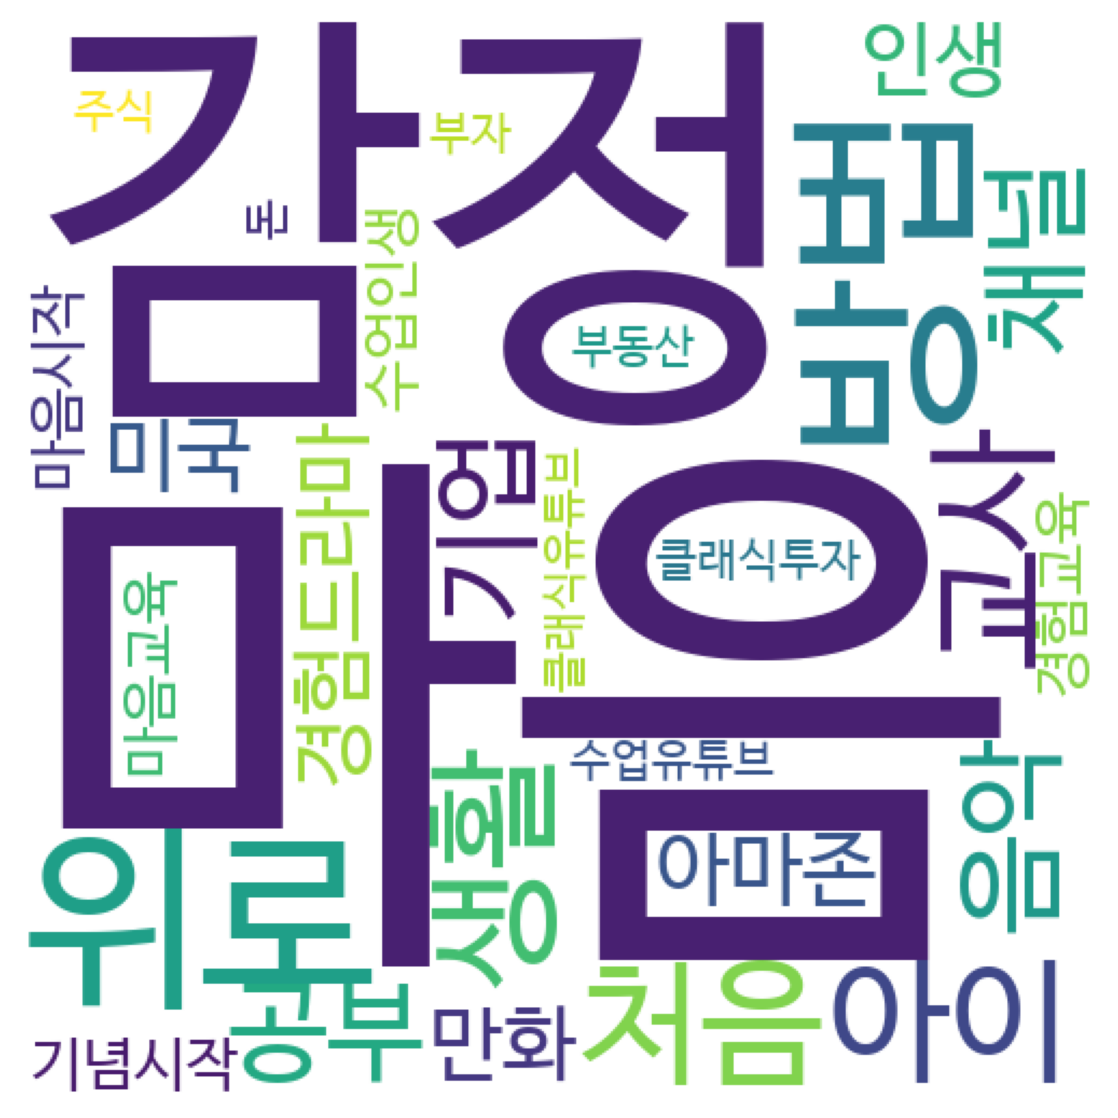

사회 정치


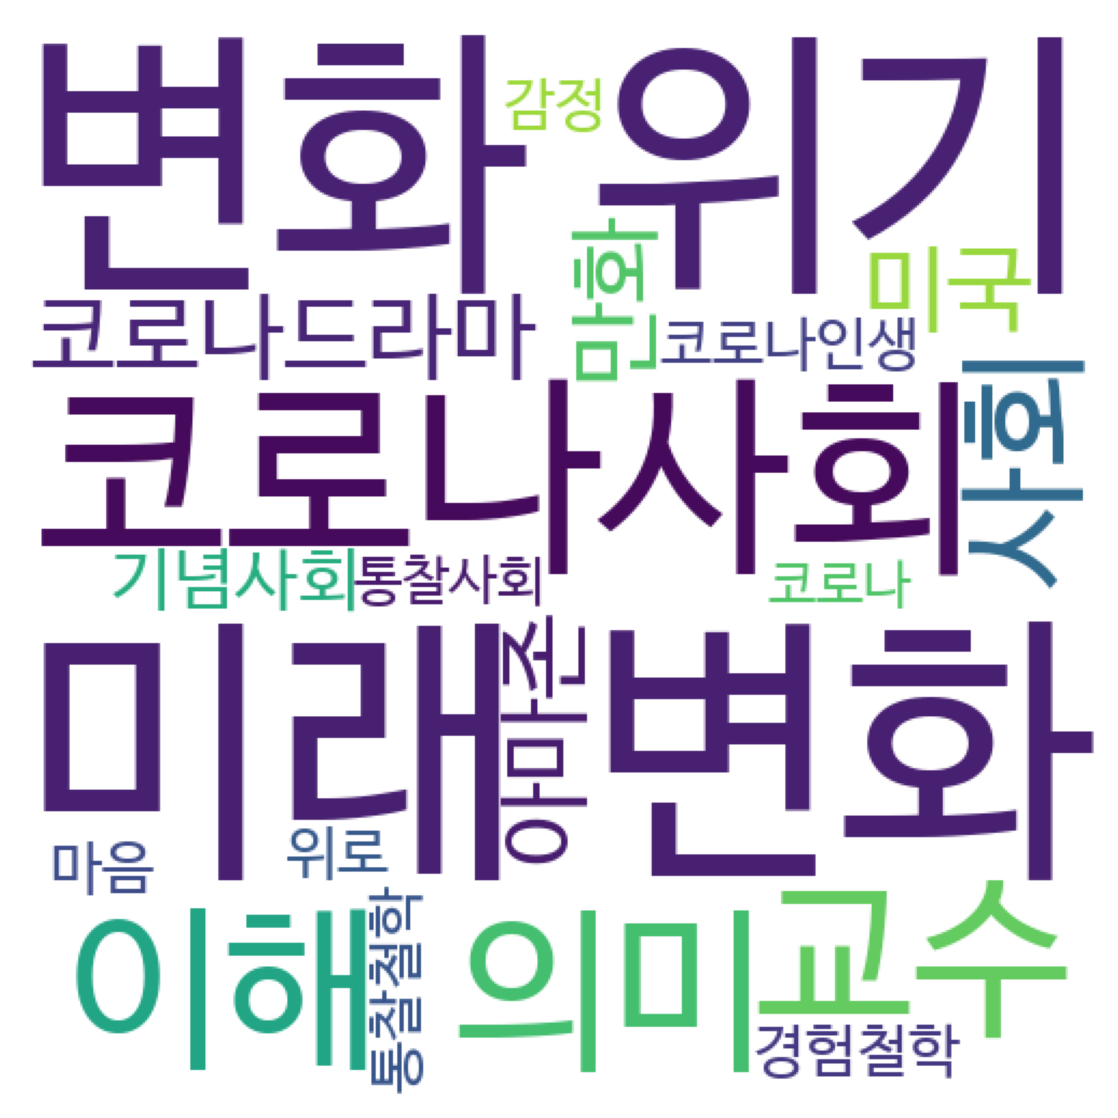

소설/시/희곡


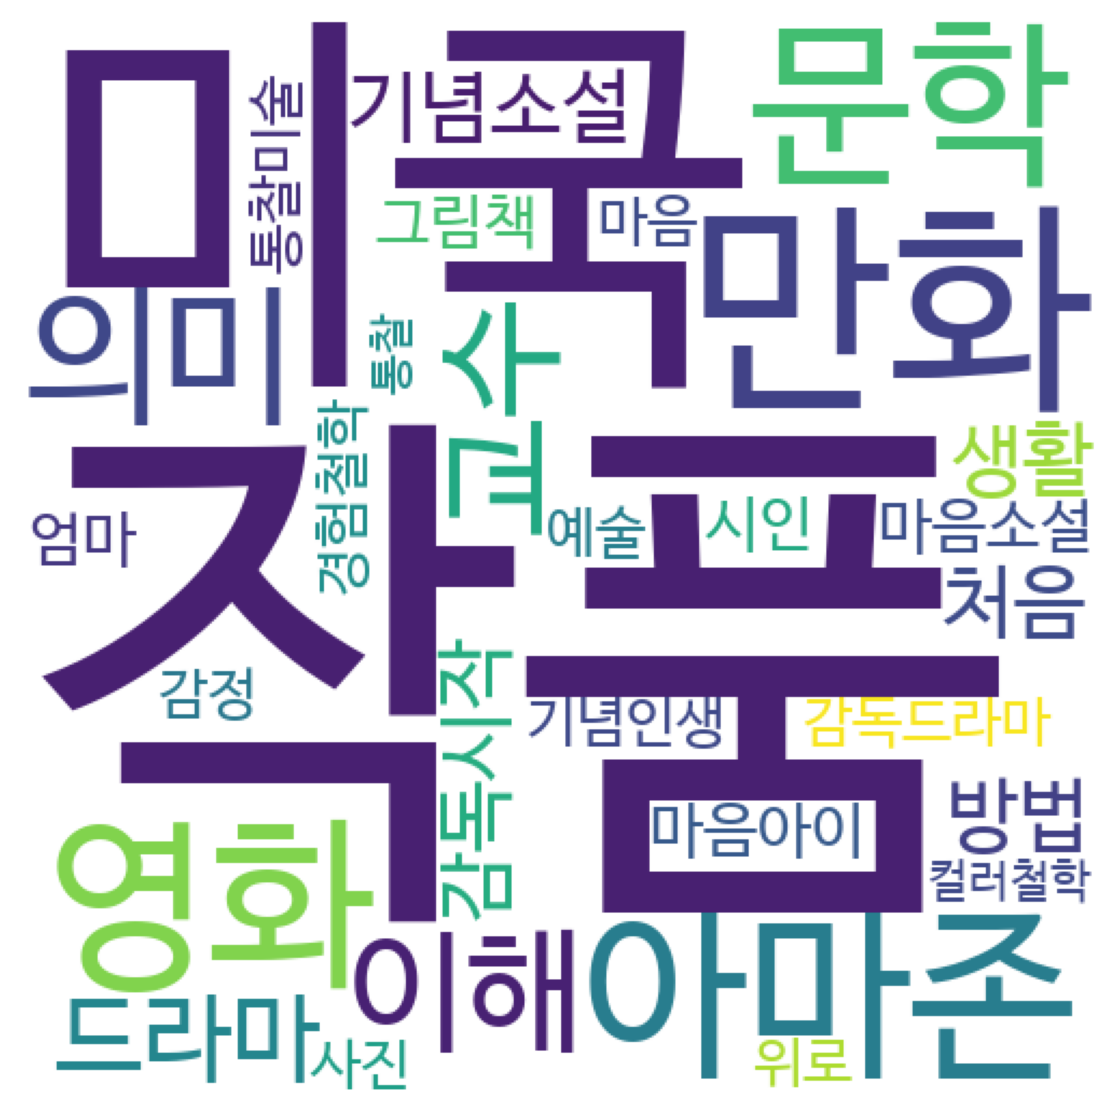

예술


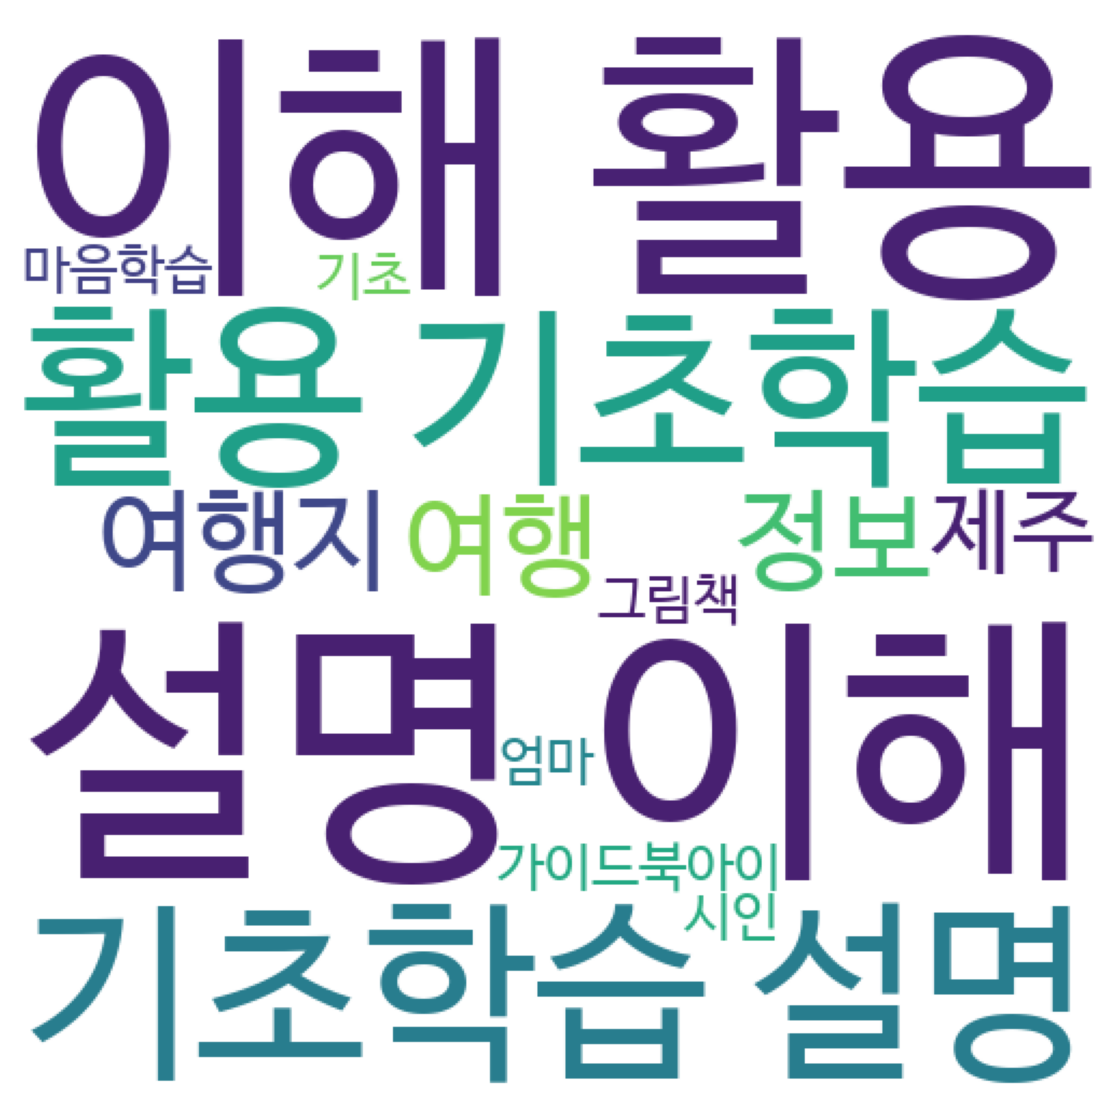

자연과학


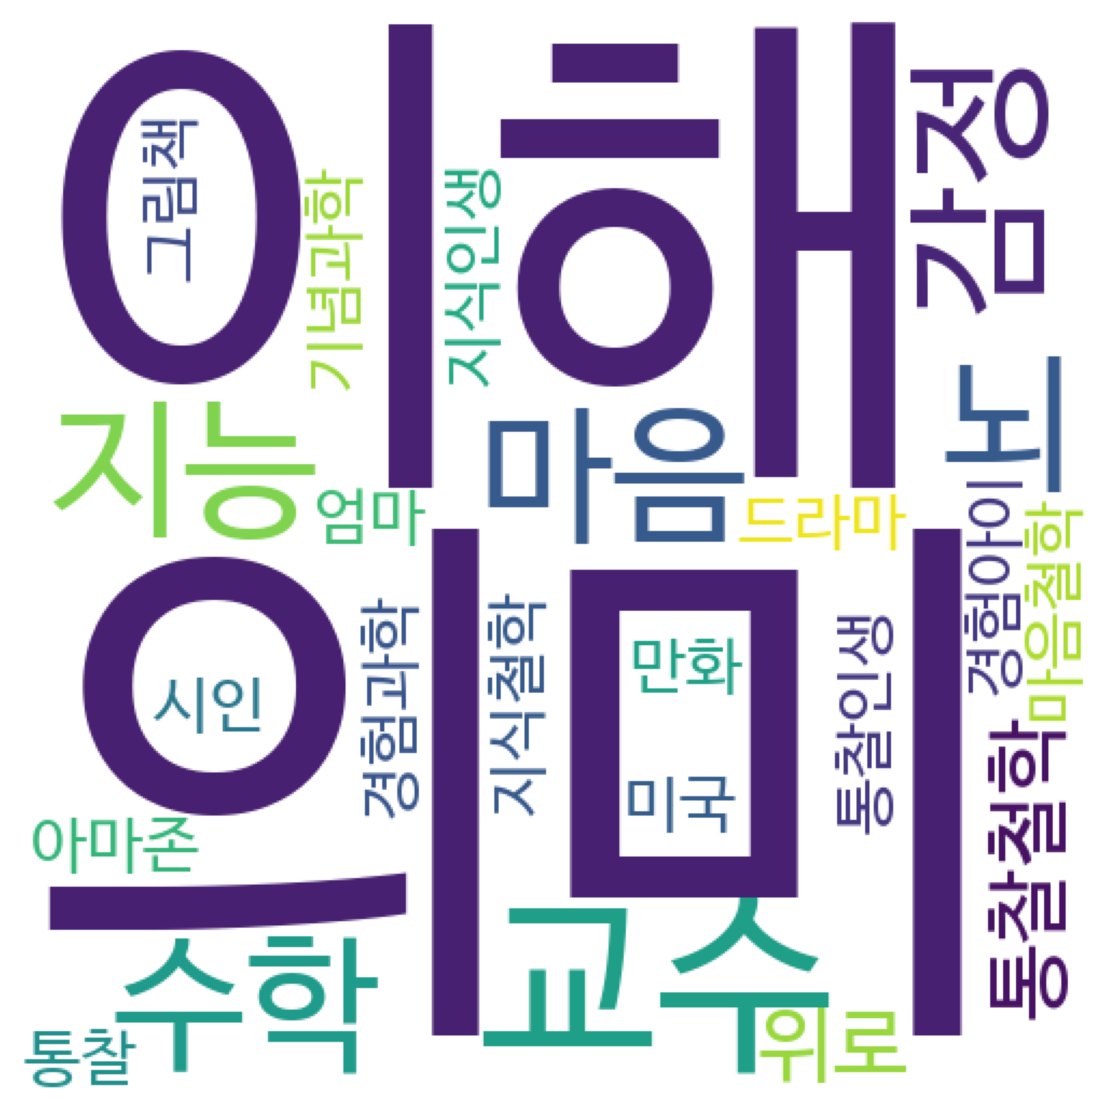

종교


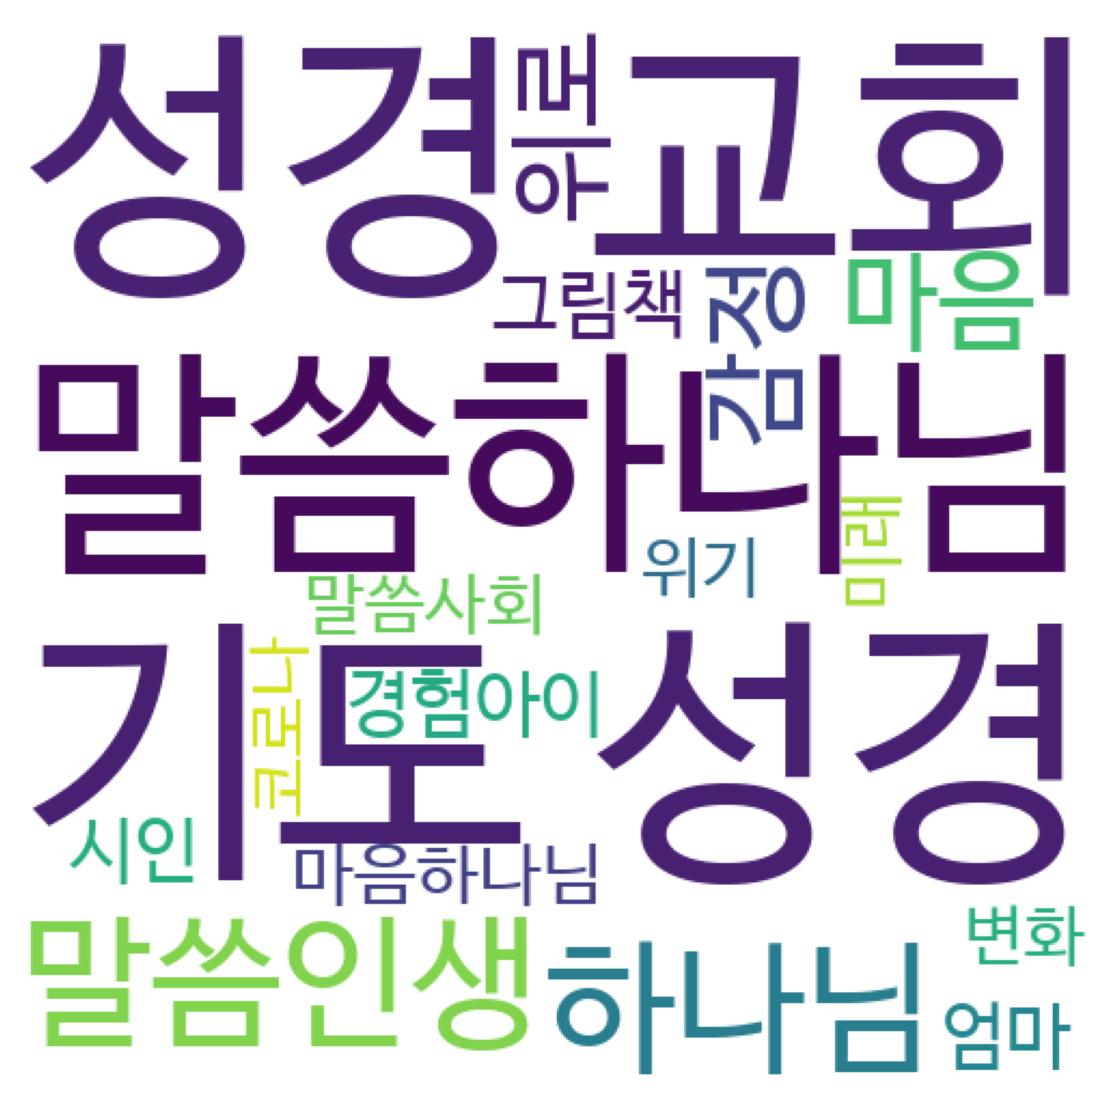

IT 모바일


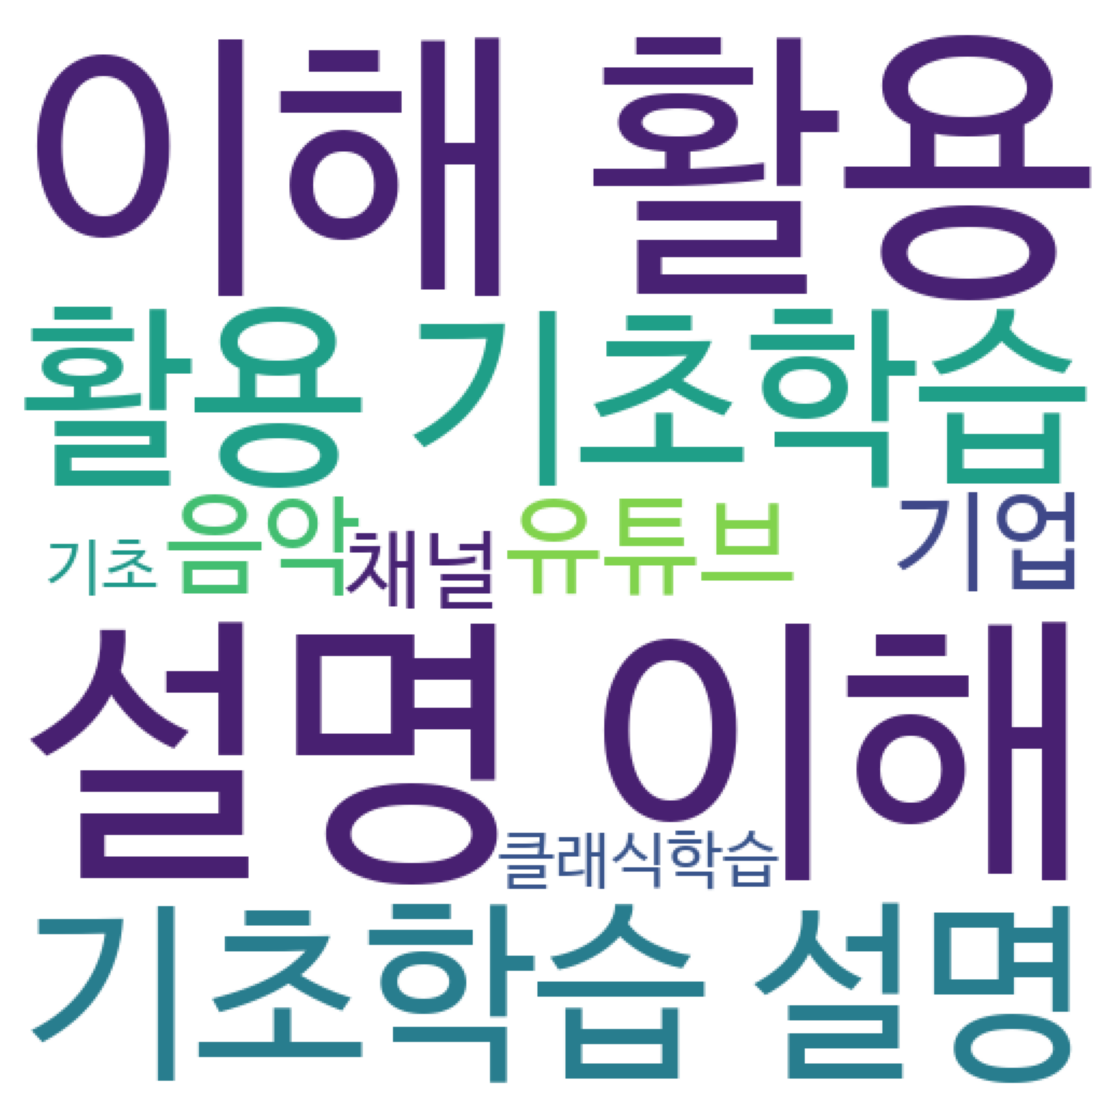

In [311]:
for topic in df["관리분류"].unique():
    print(topic)
    display_word_cloud("".join(df.loc[df['관리분류'] == topic, 'topic_words'][:10]))